Hahua Mykyta DA-22 Machine Learning Lab#2

First of all lets download and read data from google drive urls, i uploaded them on google drive

In [216]:
import os
import gdown
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

train_url = 'https://drive.google.com/uc?id=1UtU7PtyUWRJ5yJJet0gOciwvfk2Dd9IX'

train = 'train.csv'

if not os.path.exists(train):
    print(f"{train} not found. Downloading...")
    gdown.download(train_url, train, quiet=False)
else:
    print(f"{train} already exists. Skipping download.")

df_train = pd.read_csv(train)

train.csv already exists. Skipping download.


lets get info about train table

In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here we see sample of out data

In [218]:
print(df_train.shape)
df_train.head()
df_train.sample(15)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


than we check is there empty values in table

In [219]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

than we check for duplicates 

In [220]:
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


than we delete all columns where missing ratio > 30%

In [221]:
missing_ratio = df_train.isnull().sum() / len(df_train) * 100
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))

threshold = 0.3
columns_to_drop = missing_ratio[missing_ratio > threshold * 100].index
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"`Columns deleted: {columns_to_drop}")

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64
`Columns deleted: Index(['Cabin'], dtype='object')


than i fill all the empty values with median

In [222]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

print("Filled missing values in 'Age' with median value")

Filled missing values in 'Age' with median value


here we convert some numerical values into categorical

In [223]:
df_train["Sex"] = df_train["Sex"].map({"female": 0, "male": 1})
mode_value = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(mode_value)
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_train = df_train.drop(['Ticket', 'Name'], axis=1)

lets see the shape

In [224]:
print(df_train.shape)
df_train.sample(15)

(891, 11)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
566,567,0,3,1,19.0,0,0,7.8958,False,False,True
839,840,1,1,1,28.0,0,0,29.7000,True,False,False
492,493,0,1,1,55.0,0,0,30.5000,False,False,True
341,342,1,1,0,24.0,3,2,263.0000,False,False,True
738,739,0,3,1,28.0,0,0,7.8958,False,False,True
274,275,1,3,0,28.0,0,0,7.7500,False,True,False
784,785,0,3,1,25.0,0,0,7.0500,False,False,True
678,679,0,3,0,43.0,1,6,46.9000,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,True,False,False
844,845,0,3,1,17.0,0,0,8.6625,False,False,True


In [225]:
categorical_columns = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Embarked_C',]
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare',]

functions to display graphics

In [226]:
def plot_numerical_features_histogram(data, numerical_features, bins=30, figsize=(16, 20), color='g', xlabelsize=8,
                                      ylabelsize=8, title="Histograms of Numerical Features"):
    fig = data[numerical_features].hist(
        figsize=figsize,
        color=color,
        bins=bins,
        xlabelsize=xlabelsize,
        ylabelsize=ylabelsize
    )

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()

    plt.show()


def plot_correlation_heatmap(data, figsize=(16, 12), cmap="Greens", vmax=0.8, annot=True):
    corr_matrix = data.corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=figsize)
    fig.set_size_inches(20, 15)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=cmap,
        vmax=vmax,
        square=True,
        annot=annot,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        ax=ax
    )

    plt.title("Correlation Heatmap", fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()

def plot_boxplots(data, numerical_features, cols=2, figsize=(10, 4)):
    num_features = len(numerical_features)
    rows = math.ceil(num_features / cols)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize[0] * cols, figsize[1] * rows))
    fig.tight_layout(pad=3.0)

    axes = axes.flatten() if num_features > 1 else [axes]

    for i, col in enumerate(numerical_features):
        sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot for {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Value', fontsize=8)

    for j in range(len(numerical_features), len(axes)):
        axes[j].axis('off')

    plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
    plt.show()

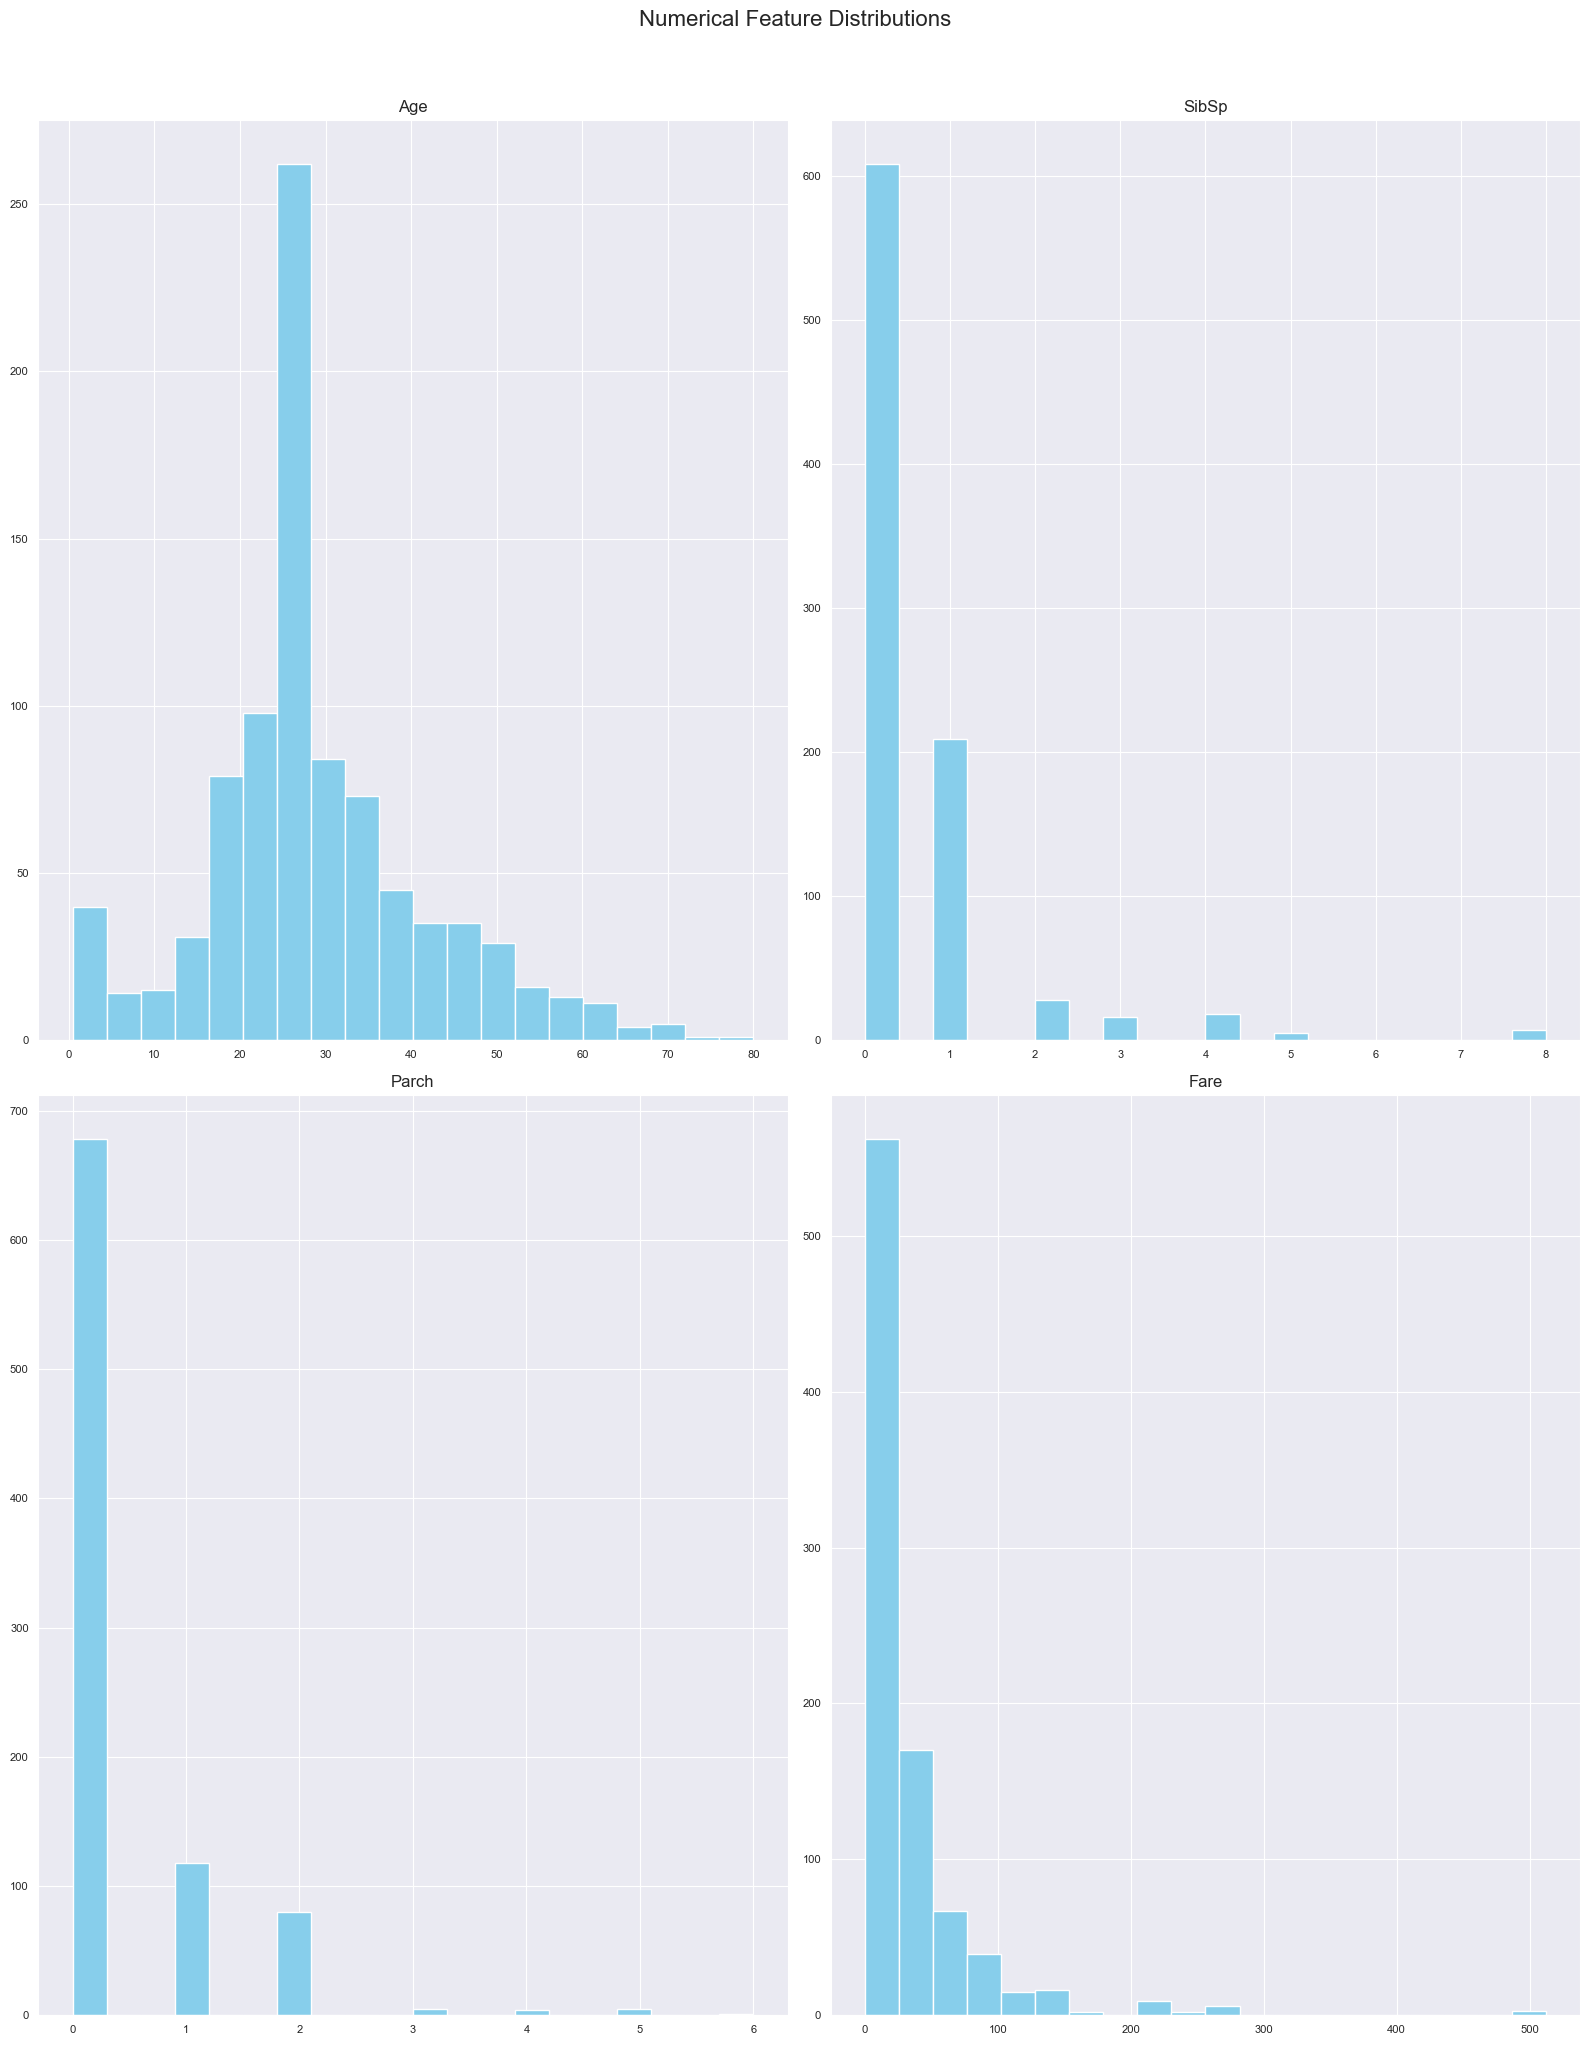

In [227]:
plot_numerical_features_histogram(df_train, numerical_columns, bins=20, color='skyblue',
                                  title="Numerical Feature Distributions")

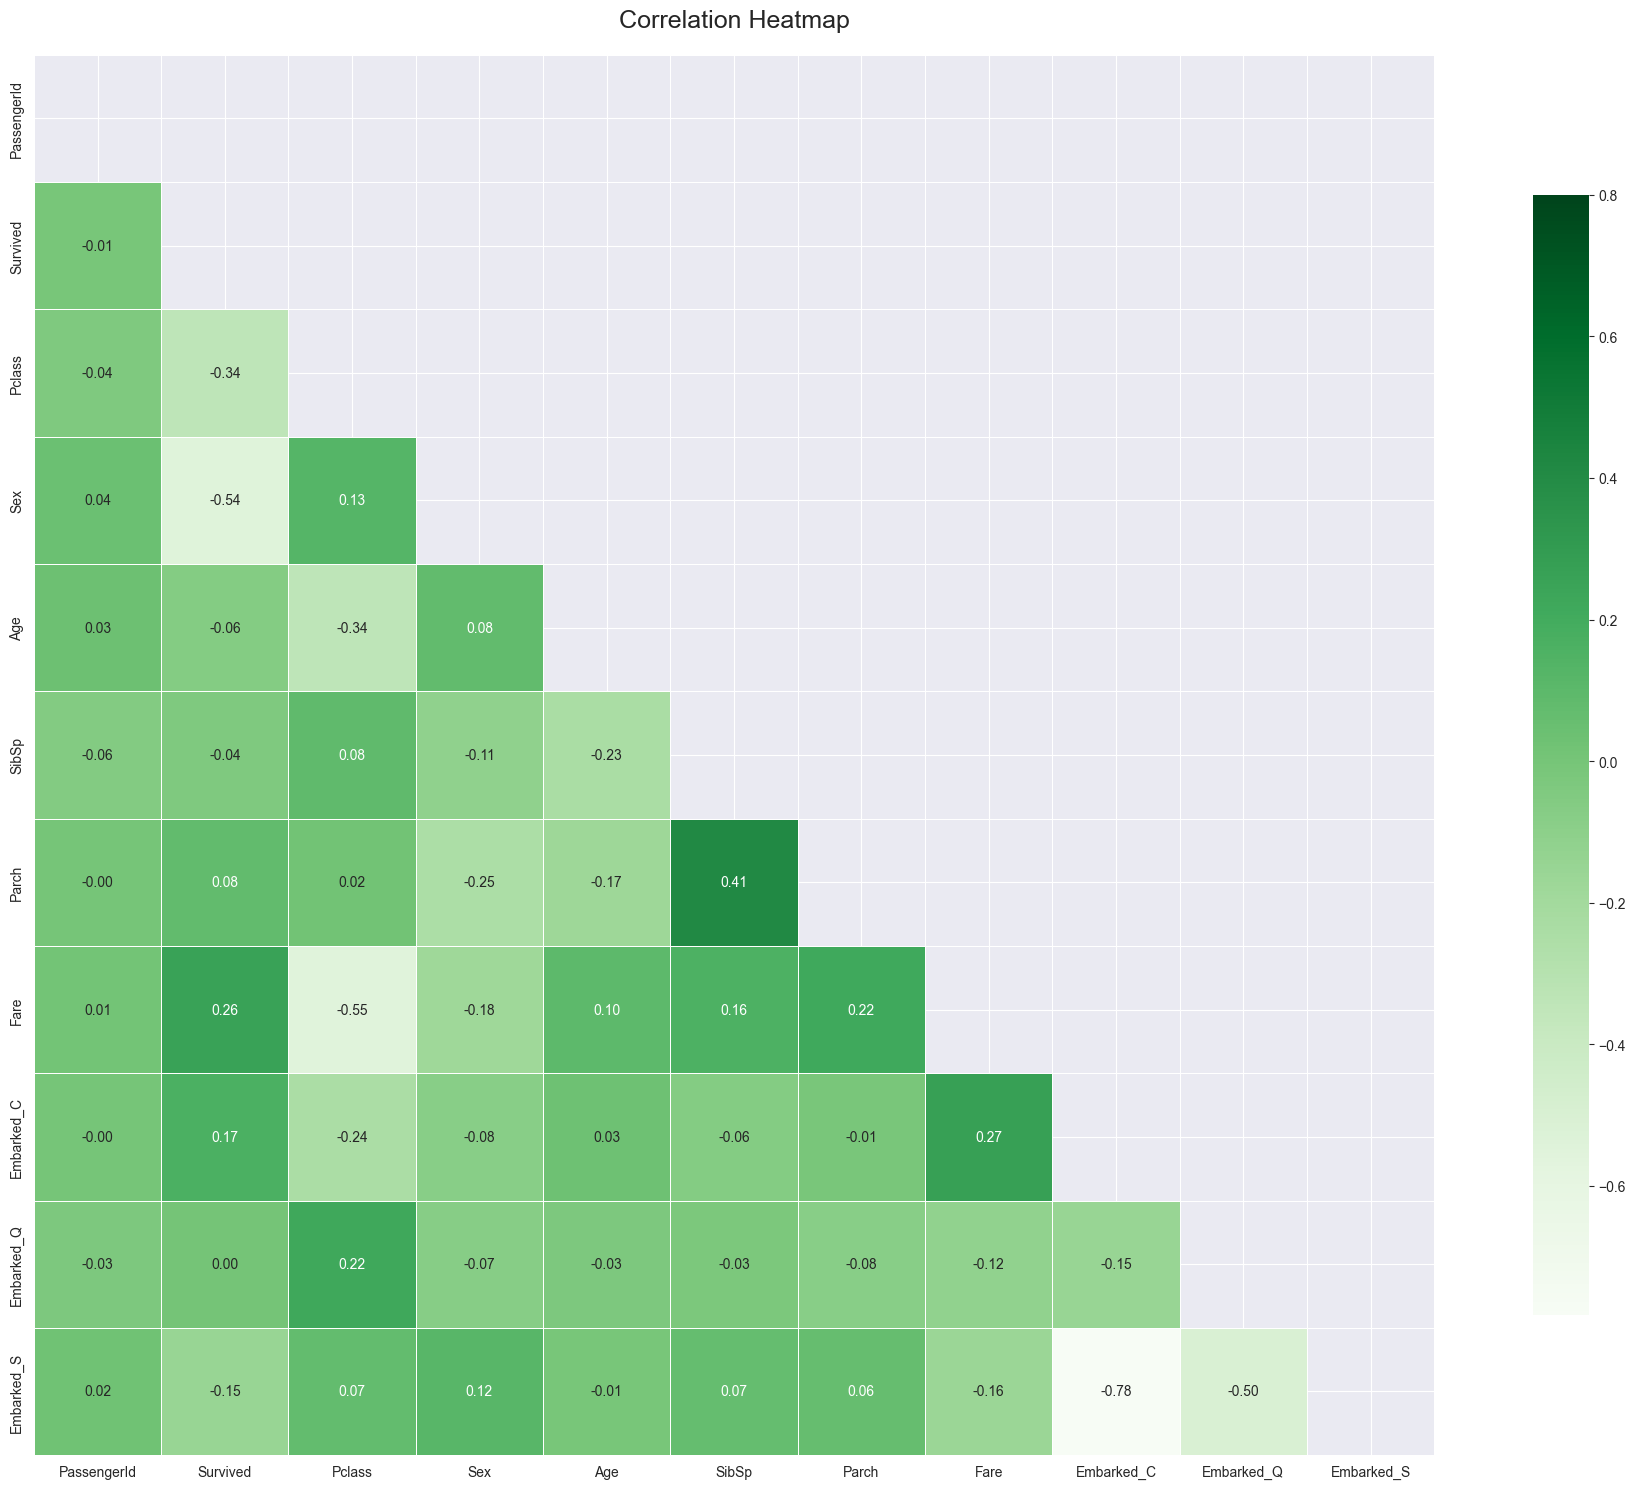

In [228]:
plot_correlation_heatmap(df_train)

here is no big correlation so i wont delete any feature 

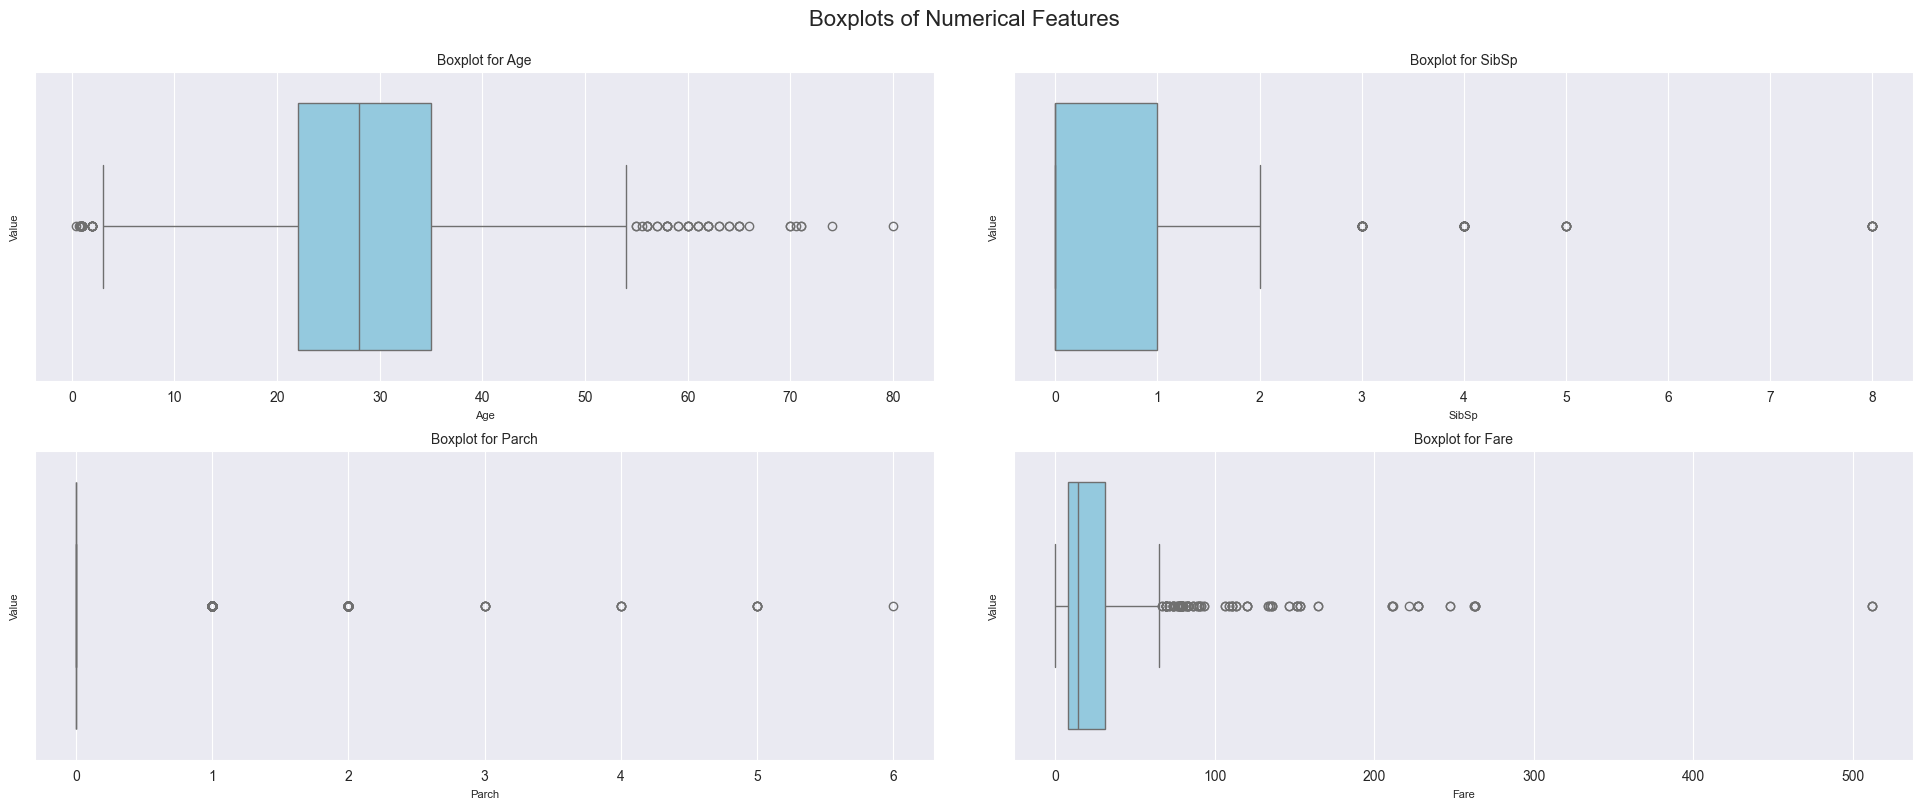

In [229]:
plot_boxplots(df_train, numerical_columns)

function to see pca projection and function to see clustering 

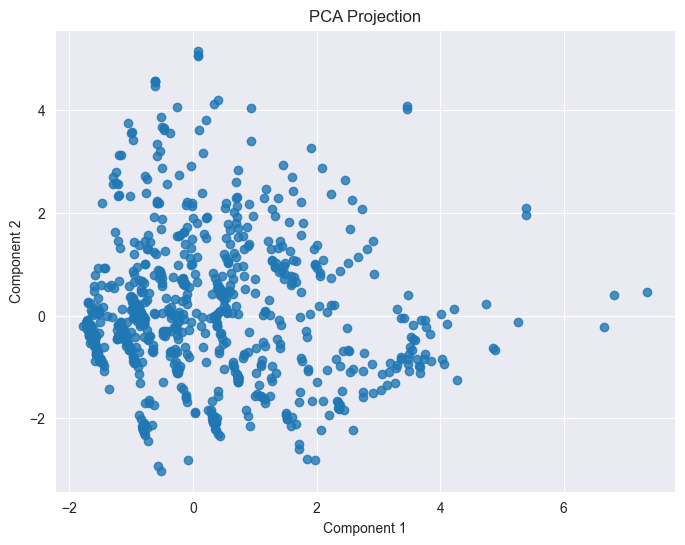

In [230]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

def plot_pca_projection(data_pca, title="PCA Projection"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


def visualize_clustering(data, labels, title="Cluster Visualization", centroids=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50, alpha=0.8)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel("Dim #1")
    plt.ylabel("Dim #2")
    plt.legend()
    plt.show()
    
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_train)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plot_pca_projection(data_pca)

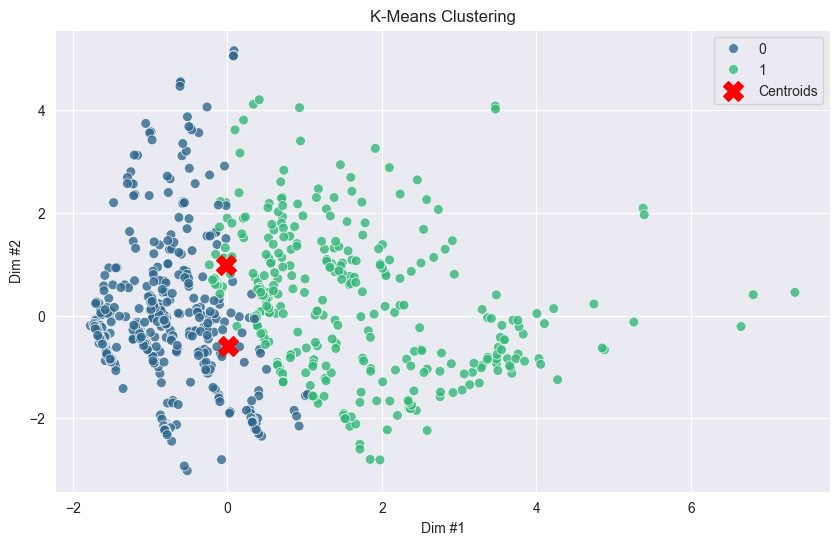

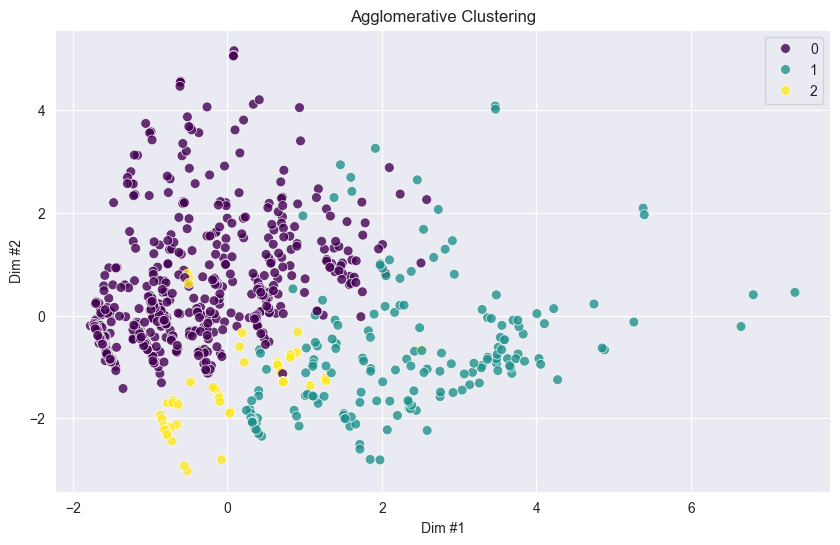

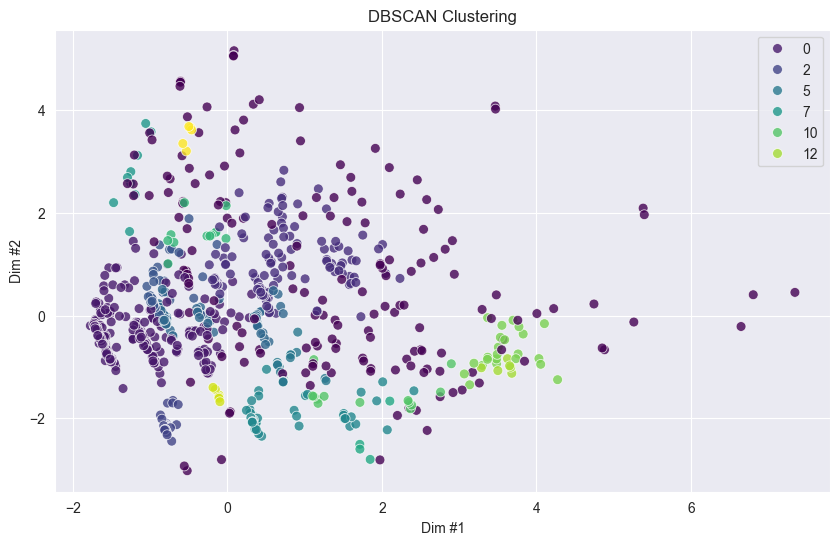

In [231]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_centroids = kmeans.cluster_centers_
visualize_clustering(data_pca, kmeans_labels, "K-Means Clustering", centroids=kmeans_centroids)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
visualize_clustering(data_pca, agglo_labels, "Agglomerative Clustering")

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
visualize_clustering(data_pca, dbscan_labels, "DBSCAN Clustering")

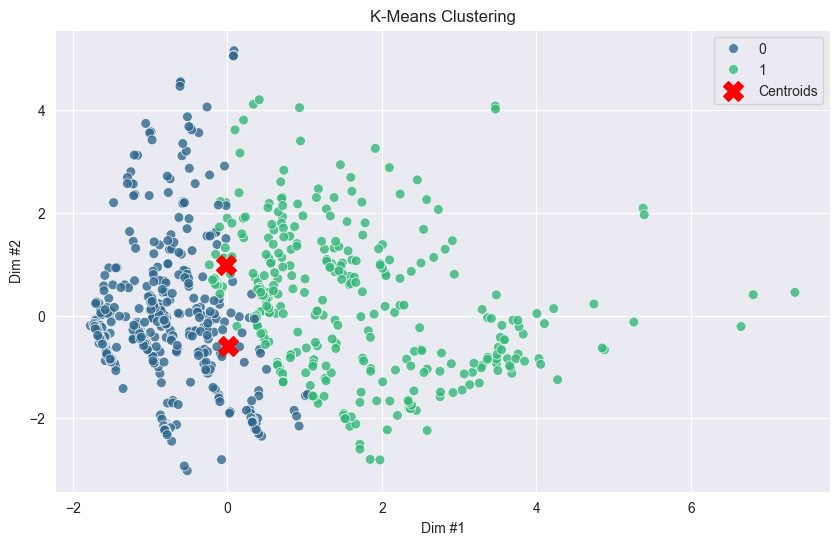

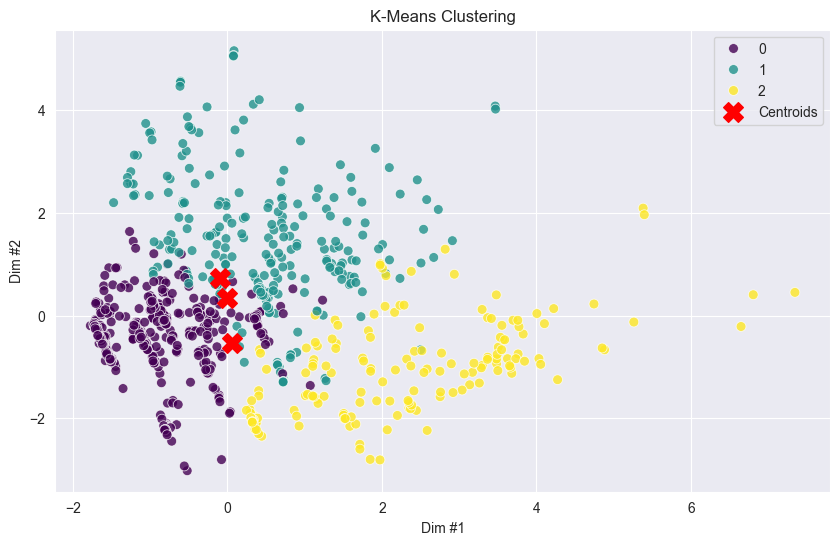

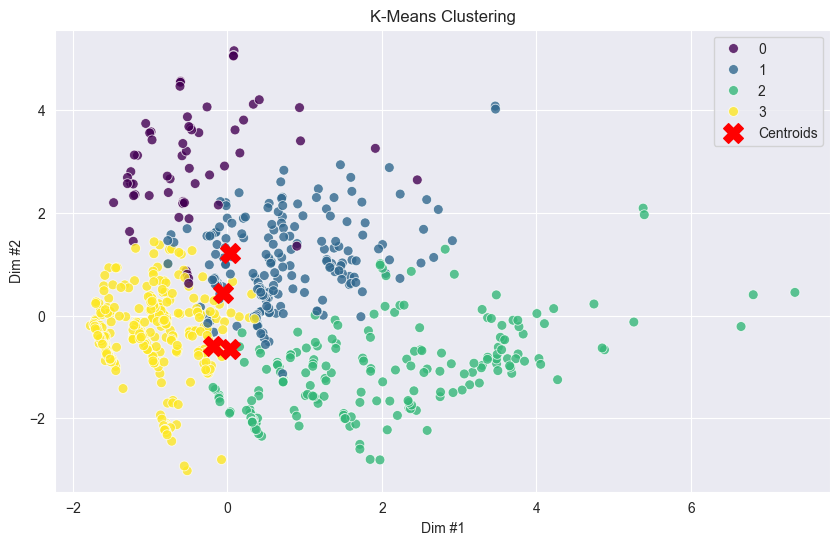

In [232]:
for i in range(2, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    kmeans_centroids = kmeans.cluster_centers_
    visualize_clustering(data_pca, kmeans_labels, "K-Means Clustering", centroids=kmeans_centroids)
